In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [30]:
data = pd.read_csv("/Users/rohanm/Downloads/creditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [31]:
data.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [32]:
data.shape

(284807, 31)

0    284315
1       492
Name: Class, dtype: int64


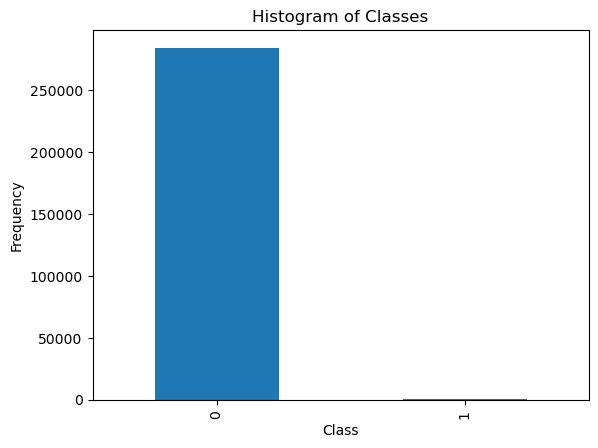

In [33]:
class_distribution = pd.value_counts(data['Class'])
print(class_distribution)

class_distribution.plot(kind = 'bar')
plt.title("Histogram of Classes")
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.show()

In [34]:
std_scaler = StandardScaler()
data = data.drop(['Time'], axis=1)
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [35]:
num_fraud = len(data[data["Class"] == 1])
indices_fraud = np.array(data[data["Class"] == 1].index)

indices_normal = data[data["Class"] == 0].index
rand_indices_normal = np.array(np.random.choice(indices_normal, num_fraud, replace = False))

indices_undersample = np.concatenate([indices_fraud, rand_indices_normal])
df = data.iloc[indices_undersample,:]

print(pd.value_counts(df['Class']))

X = df.drop('Class', axis=1)
y = df['Class']

1    492
0    492
Name: Class, dtype: int64


In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

print("size of train dataset: ", len(X_train))
print("size of test dataset: ", len(X_test))

size of train dataset:  688
size of test dataset:  296


In [38]:
X_train = std_scaler.fit_transform(X_train)
X_test = std_scaler.transform(X_test)

In [39]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'Gradient Boosting': GradientBoostingClassifier()
}

for name, model in models.items():
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy:.4f}")
    print("Confusion Matrix:\n", confusion)
    print("Classification Report:\n", report)
    print("_"*40)
    

Model: Logistic Regression
Accuracy: 0.9493
Confusion Matrix:
 [[146   3]
 [ 12 135]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.98      0.95       149
           1       0.98      0.92      0.95       147

    accuracy                           0.95       296
   macro avg       0.95      0.95      0.95       296
weighted avg       0.95      0.95      0.95       296

________________________________________
Model: Decision Tree
Accuracy: 0.8919
Confusion Matrix:
 [[135  14]
 [ 18 129]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.91      0.89       149
           1       0.90      0.88      0.89       147

    accuracy                           0.89       296
   macro avg       0.89      0.89      0.89       296
weighted avg       0.89      0.89      0.89       296

________________________________________
Model: Random Forest
Accuracy: 0.9595
Confusion Ma